# Intro Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Buscar un conjunto de datos a analizar:

In [2]:
df = pd.read_csv("../ficheros/Diamonds_Prices2022.csv",index_col =0)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### INFORMACIÓN SOBRE NUESTRAS VARIABLES
---

Qué es cada una de nuestras variables
- *carat* = Quilate
- *cut* = tipo de corte
- *color* = color
- *clarity* = transparencia
- *depth* =  porcentaje de profundidad
- *table* = base
- *price* = precio $
- *x* = altura
- *y* = anchura
- *z* = profundidad

Nuestra columna respuesta será **price**


- **carat** is a measure of diamond weight. One carat is equivalent to 0.2 grams.

- **clarity** refers to how clear a diamond is. Diamonds often contain imperfections like cracks or mineral deposits. The fewer and less noticeable a diamond’s imperfections, the better its clarity. clarity contains 8 ordered levels, from “I1” (the worst) to “IF” (the best).

- **color** refers to the color of the diamond. Colorless diamonds are considered better than diamonds with a yellow tint. Diamonds contains diamonds of 7 different colors, represented by different letters. “D” - “F” diamonds are considered colorless, while “G” - “J” diamonds have a very faint color. This grading is determined by the intensity of the color, and from least to most saturated are graded as faint, very light, light, fancy light, fancy, fancy intense, fancy vivid, fancy dark, or fancy deep. The deeper and more intense the color, the more expensive the diamond will be.

    *Helpful Hint:* Diamond prices decline or increase in alphabetical order. For example, a diamond with a G colour grade is less expensive than a diamond with a D colour grade.

- **cut** refers to how a rough diamond is shaped into a finished diamond. Better cuts create more symmetrical and luminous diamonds. cut has 5 ordered levels: “Fair,” “Good,” “Very Good,” “Premium,” “Ideal.”

- **x**, **y**, **z**, **depth**, and **table** are various measures of a diamond’s size, in millimeters

Hacemos un EDA sencillo

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df.shape # tiene 53943 filas y 10 columnas

(53943, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Tenemos 3 columnas categoricas y 7 columnas numéricas

In [7]:
df.isnull().sum() # comprobamos que no hay nulos

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.describe().T # comprobamos primero las numéricas

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [9]:
df.describe(include="object").T # ahora hacemos el describe para las categóricas

,count,unique,top,freq
cut,53943,5,Ideal,21551
color,53943,7,G,11292
clarity,53943,8,SI1,13067


In [10]:
# Comprobamos los duplicados
df.duplicated().sum()

149

In [11]:
# vamos a proceder a eliminar los duplicados
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum() # comprobamos que se hayan eliminado

0

In [13]:
df.shape    # ahora nos hemos quedado con 53794 filas

(53794, 10)

### Detectando outliers

In [14]:
# Hacemos un nuevo dataframe con las columnas numéricas
df_numericas = df.select_dtypes(include= np.number)
df_numericas.head(2)

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31


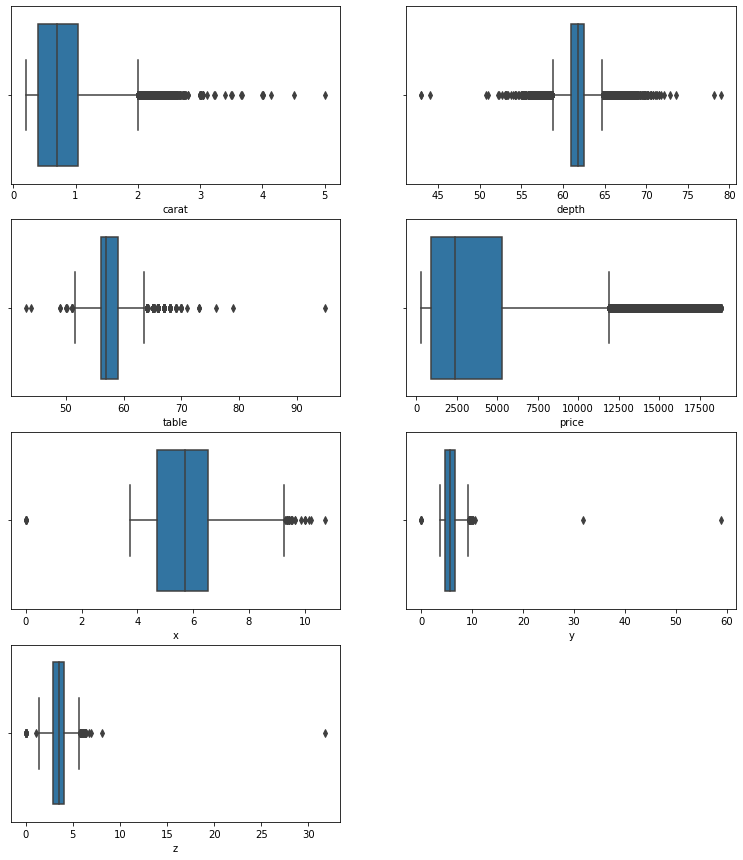

In [15]:
# Con boxplot vemos visualmente los outliers
fig, axes = plt.subplots(4,2, figsize = (13,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data= df, ax= axes[indice])
    
fig.delaxes(axes[-1]);


Tenemos muchos outliers en nuestra variable respuesta, que será price

In [17]:
# Función para detectar los outliers
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 

   
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices

In [18]:
index_price = detectar_outliers(["price"], df)

In [19]:
len(index_price["price"])

3523

Como tenemos muchos datos y no va a suponer un problema perder algunos, vamos a crear un df sin los outliers de la columna price.

In [20]:
# Creamos una lista para pasarla en el drop
lista_indice = index_price["price"]

In [21]:
df2 = df.drop(lista_indice, axis = 0)

In [22]:
df2.shape # Comprobamos la forma

(50271, 10)

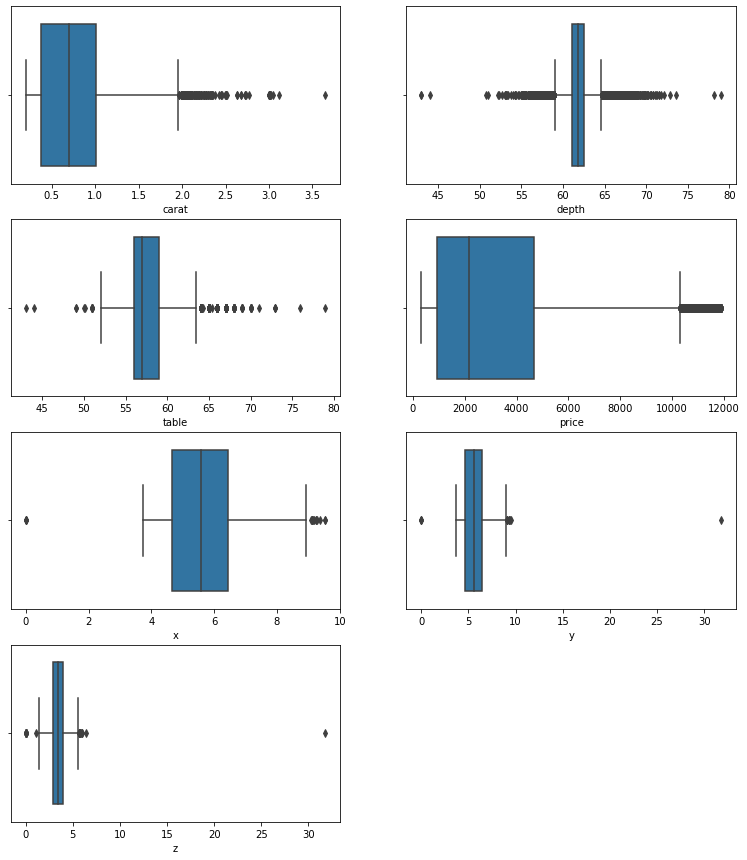

In [23]:
# Hacemos otro boxplot para ver cómo va quedando
fig, axes = plt.subplots(4,2, figsize = (13,15))
axes = axes.flat 

for indice, columna in enumerate(df2.select_dtypes(include = np.number).columns):
    sns.boxplot(x = df2[columna], data= df2, ax= axes[indice])
    
fig.delaxes(axes[-1]);


Como tenemos todavía algún outlier muy exagerado en las variables z e y, los eliminamos

In [24]:
index_z = detectar_outliers(["z", "y"], df2)

In [25]:
lista_borrar = index_z["z"] + index_z["y"]

In [26]:
df_sin_outliers = df2.drop(lista_borrar, axis= 0)

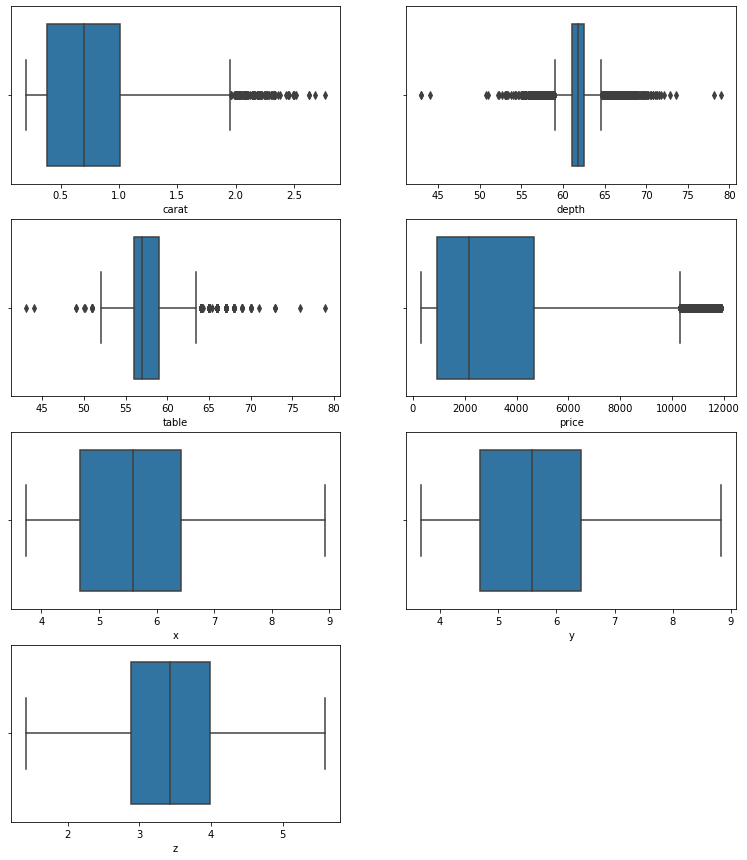

In [27]:
fig, axes = plt.subplots(4,2, figsize = (13,15))
axes = axes.flat 

for indice, columna in enumerate(df_sin_outliers.select_dtypes(include = np.number).columns):
    sns.boxplot(x = df_sin_outliers[columna], data= df_sin_outliers, ax= axes[indice])
    
fig.delaxes(axes[-1]);

Seguimos teniendo outliers en algunas columnas, pero como no queremos eliminar demasiados datos de momento, los dejaremos así y luego si hace falta veremos si tenemos que eliminarlos.

A continuacion  hacemos una grafica para ver la relación entre las variables predictoras y la variable respuesta

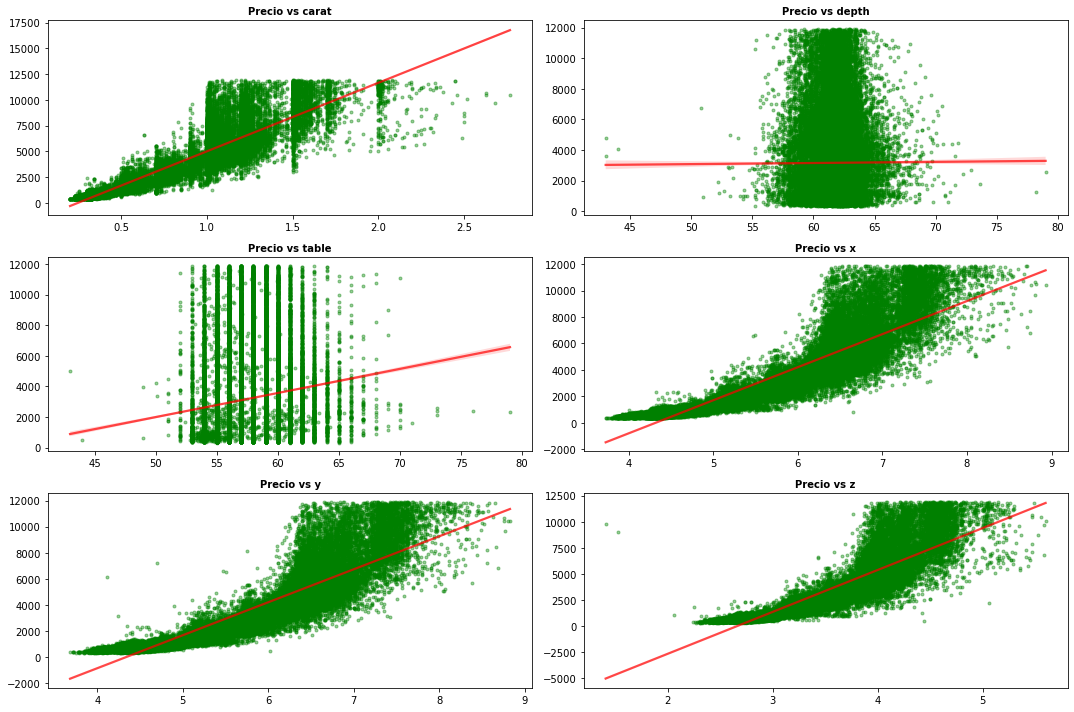

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
axes = axes.flat
columnas_numeric = df_sin_outliers.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")
for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_sin_outliers[colum],
        y = df_sin_outliers["price"],
        color = "green",
        marker = ".",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "red", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.tight_layout();

Tanto el *carat* como la *x*, *y* , *z* parecen influir en el precio. Cuanto mayores son, mayor será el precio. Vemos que, sin embargo, el *depth* no parece influir en el precio, y el *table* tampoco.

<AxesSubplot:>

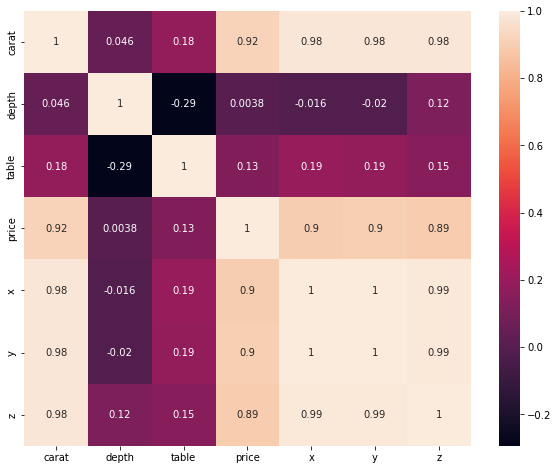

In [29]:
sns.heatmap(df_sin_outliers.corr(), annot=True)

Y con este heatmap, confirmarmos las relaciones que ya habiamos expuesto anteriormente

In [30]:
# Guardamos el archivo limpio
df_sin_outliers.to_csv("../ficheros/diamons_01.csv")